In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

#with warnings.catch_warnings(record=True):
#warnings.simplefilter("ignore")


In [2]:
df_eam = pd.read_excel('eam.xlsx')
df_custo = pd.read_excel('custo.xlsx')
df_pcfactory = pd.read_excel('pcfactory.xlsx')
#df_IAF = pd.read_excel('iafs.xlsx')
#IAF's

C:\Users\User\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Manipulação dos dados Custo

In [3]:
df_custo.head()

,Empresa,Estabel,Nr Requisicao,Situacao Req.,Estados Req.,Usuario,Comprador,Conta,CC,TP,...,INV Nr Estb Exec,INV Nr Ordem EMS,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,100,L30,688151,Com Ordem,Aprovada,coliveira,mbelomo,13201033,,PC,...,L30,5864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,L30,688958,Fechada,Aprovada,pcmbtu,,41650000,12508,RQ,...,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100,L30,688958,Fechada,Aprovada,pcmbtu,,41650000,12508,RQ,...,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100,l30,691078,Fechada,Aprovada,pcmbtu,,41650000,12400,RQ,...,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100,l30,691078,Fechada,Aprovada,pcmbtu,,41650000,12400,RQ,...,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_custo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Empresa           2909 non-null   int64         
 1   Estabel           2909 non-null   object        
 2   Nr Requisicao     2909 non-null   int64         
 3   Situacao Req.     2909 non-null   object        
 4   Estados Req.      2909 non-null   object        
 5   Usuario           2909 non-null   object        
 6   Comprador         2909 non-null   object        
 7   Conta             2909 non-null   object        
 8   CC                2909 non-null   object        
 9   TP                2909 non-null   object        
 10  Data Requisicao   2909 non-null   datetime64[ns]
 11  Data Entrega      2909 non-null   object        
 12  Item              2909 non-null   float64       
 13  Descricao         2909 non-null   object        
 14  Situacao Item     2909 n

In [45]:
#Corrigir espaços e maiúsculas por colunas

df_custo['Usuario'] = df_custo['Usuario'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df_custo['Usuario'] = df_custo['Usuario'].apply(lambda x: x.replace(" ", "") if isinstance(x, str) else x)

df_custo['Conta'] = df_custo['Conta'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df_custo['Conta'] = df_custo['Conta'].apply(lambda x: x.replace(" ", "") if isinstance(x, str) else x)

In [46]:
#Verificar o usuario e separar por manutenção

df_custo.loc[df_custo['Usuario'] == 'pcmbtu', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'sergiob', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'cledson', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'felipini', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'ferram-btu', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'minichello', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'cignoni', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'ptavares', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'silesio', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'marcioc', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'rodrigocesar', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'catharino', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'vernini', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'lucianom', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'lfedele', 'Usuario'] = 'manutenção'
#df_custo.loc[df_custo['Usuario'] == 'mfrederik', 'Usuario'] = 'manutenção'
df_custo.loc[df_custo['Usuario'] == 'albert', 'Usuario'] = 'manutenção'

In [61]:
#Verificacao do codigo

df_custo.loc[df_custo['Conta'] == 13201033, 'Conta'] = 'IAF'
df_custo.loc[df_custo['Conta'] == 10821508, 'Conta'] = '13J'
df_custo.loc[df_custo['Conta'] == 41405000, 'Conta'] = '1J'
df_custo.loc[df_custo['Conta'] == 41651000, 'Conta'] = '2J'
df_custo.loc[df_custo['Conta'] == 41663010, 'Conta'] = '3J'
df_custo.loc[df_custo['Conta'] == 41650000, 'Conta'] = '4J'
df_custo.loc[df_custo['Conta'] == 41663009, 'Conta'] = '5J'
df_custo.loc[df_custo['Conta'] == 41649000, 'Conta'] = '6J'
df_custo.loc[df_custo['Conta'] == 41663008, 'Conta'] = '7J'
df_custo.loc[df_custo['Conta'] == 41653000, 'Conta'] = '8J'
df_custo.loc[df_custo['Conta'] == 41663011, 'Conta'] = '9J'
df_custo.loc[df_custo['Conta'] == 41663002, 'Conta'] = '11J'
df_custo.loc[df_custo['Conta'] == 41647000, 'Conta'] = '12J'
df_custo.loc[df_custo['Conta'] == 41647000, 'Conta'] = '13J'
df_custo.loc[df_custo['Conta'] == 41655000, 'Conta'] = '14J'
df_custo.loc[df_custo['Conta'] == 41663099, 'Conta'] = '15J'
df_custo.loc[df_custo['Conta'] == 41663007, 'Conta'] = '16J'
df_custo.loc[df_custo['Conta'] == 41625001, 'Conta'] = '17J'
df_custo.loc[df_custo['Conta'] == 41625004, 'Conta'] = '18J'
df_custo.loc[df_custo['Conta'] == 41625005, 'Conta'] = '19J'
df_custo.loc[df_custo['Conta'] == 41655001, 'Conta'] = '20J'
df_custo.loc[df_custo['Conta'] == 41606000, 'Conta'] = '21J'
df_custo.loc[df_custo['Conta'] == 41607000, 'Conta'] = '22J'
df_custo.loc[df_custo['Conta'] == 41647002, 'Conta'] = '23J'
df_custo.loc[df_custo['Conta'] == 41663016, 'Conta'] = '24J'
df_custo.loc[df_custo['Conta'] == 21747008, 'Conta'] = 'Elimina'
df_custo.loc[df_custo['Conta'] == 41505000, 'Conta'] = 'Elimina'
df_custo.loc[df_custo['Conta'] == 41663005, 'Conta'] = 'Elimina'


for index, row in df_custo.iterrows():
    if row['Usuario'] != 'manutenção':
        df_custo.loc[index, 'Conta'] = 'Elimina'



In [55]:
#Gastos por setores 4J

Setores = df_custo[df_custo['Conta'] == '4J'].groupby('CC')['Val.Item Req.'].sum()

print(Setores)

CC
11145      4900.00
12050     20462.67
12090     26497.05
12200     24734.89
12250     59941.04
12300      1906.32
12400    131718.82
12410     16696.97
12420     11898.56
12430     14676.74
12506      2694.33
12507     18203.32
12508      6056.58
12510      1139.00
12520       196.63
12530      8957.59
12540      4682.05
12550      2591.51
12600      4738.22
12800       483.29
13105      5760.00
13900      4564.07
16100      2568.12
16200     70676.85
16600      6972.16
16700      3723.78
16850      1860.00
Name: Val.Item Req., dtype: float64


In [56]:
#Gastos por setores 5J
Setores = df_custo[df_custo['Conta'] == '5J'].groupby('CC')['Val.Item Req.'].sum()

print(Setores)

CC
11145     5906.96
12050     4315.00
12090    27858.93
12200     6312.13
12250    15368.51
12300     1062.13
12400    61241.03
12410     1264.50
12430     9592.25
12506     1062.13
12507    21307.88
12508     5524.00
12510     7690.00
12540     7987.94
12550     4373.12
12600    12727.99
13900     2759.39
16100      188.00
16200    47219.33
16600     2432.13
16850      324.32
Name: Val.Item Req., dtype: float64


In [99]:
#Tabela com todas as contas
df_custo_filtrado = df_custo[(df_custo['Conta'] != 'Elimina') & (df_custo['Conta'] != 'IAF')].copy()

Contas = df_custo_filtrado.groupby('Conta')['Val.Item Req.'].sum()

Valor_maximo = {'1J': 18901, '2J': 35000, '3J': 70000, '4J': 460000, '5J': 250000, '6J': 2500, '7J': 7500,
                          '8J': 4000, '9J': 15000, '11J': 10000, '12J': 28000, '13J': 35000, '14J': 2000, '15J': 20000,
                          '16J': 10000, '17J': 1500, '18J': 3000, '19J': 3000, '20J': 2000, '21J': 10000, '22J': 2000,
                          '23J': 1000, '24J': 8500} 

Contas_com_maximo = Contas.reset_index().assign(Orçado=Contas.index.map(Valor_maximo))

Contas_com_maximo['Saldo'] = Contas_com_maximo['Orçado'] - Contas_com_maximo['Val.Item Req.']
Contas_com_maximo = Contas_com_maximo.rename(columns={'Val.Item Req.': 'Utilizado'})

ordem_contas = ['1J', '2J', '3J', '4J', '5J', '6J', '7J', '8J', '9J', '11J', '12J', '13J', '14J', '15J', '16J', '17J', '18J', '19J', '20J', '21J', '22J', '23J', '24J']


Contas_com_maximo['Conta'] = pd.Categorical(Contas_com_maximo['Conta'], categories=ordem_contas, ordered=True)

Contas_com_maximo = Contas_com_maximo.sort_values('Conta')

Contas_com_maximo['Disp %'] = ((Contas_com_maximo['Orçado'] - Contas_com_maximo['Utilizado']) / Contas_com_maximo['Orçado']) * 100
Contas_com_maximo['Disp %'] = Contas_com_maximo['Disp %'].astype(int)

print(Contas_com_maximo)


   Conta  Utilizado  Orçado     Saldo  Disp %
6     2J   34689.90   35000    310.10       0
7     3J   65142.79   70000   4857.21       6
8     4J  459300.56  460000    699.44       0
9     5J  246517.67  250000   3482.33       1
10    7J    6810.00    7500    690.00       9
11    8J      43.30    4000   3956.70      98
12    9J   17348.00   15000  -2348.00     -15
0    11J    3350.00   10000   6650.00      66
1    12J   58083.26   28000 -30083.26    -107
2    15J    2610.00   20000  17390.00      86
3    17J    3274.39    1500  -1774.39    -118
4    18J     771.70    3000   2228.30      74
5    24J    7500.00    8500   1000.00      11


Manipulação dos dados EAM

In [9]:
df_eam.head()

,Ordem de serviço,Descrição,Classe,Prioridade,Atribuído a,Atribuído a nome,Supervisor,Status,Descrição do equipamento,Local do serviço,...,Equipamento,Relatado por,Data de início programada,Nível,Horas estimadas,Pessoal requerido,Tipo,Data do informe,Horas de parada,Homem hora
0,30004,Regularização dos ramais da expedição,PRV-AJUS,P2 - Média,RM045,David Welington Oliveira Soares Leitão,RM023,Em execução,Predial,Predial,...,109,RM045,2023-10-06,ELET,14.0,1.0,Preventiva,2023-10-06 13:20:00,NaN,14.0
1,30003,Substituição do pente de diodos da fase R da p...,COR-EMER,P1 - Alta,RM005,Wilson Pelicia,RM021,Serviço executado,Formação,Linha Hydrodyn,...,30749,RM005,2023-10-05,ELET,2.0,1.0,Corretiva,2023-10-06 08:03:00,NaN,2.0
2,30002,Substituição do Trocador de íons da HF1.,COR-PROG,P2 - Média,RM005,Wilson Pelicia,RM021,Serviço executado,Formação,Linha Hydrodyn,...,30749,RM005,2023-10-06,ELET,1.0,1.0,Corretiva,2023-10-05 07:46:00,NaN,1.0
3,30001,Substituir o Detector de potencial dos Eletro...,COR-PROG,P2 - Média,RM005,Wilson Pelicia,NaN,Serviço executado,Formação,Linha Hydrodyn,...,30749,RM005,2023-10-05,ELET,1.0,1.0,Corretiva,2023-10-06 07:39:00,NaN,1.0
4,30000,Substituir engate rápido das conexões do tri...,COR-PROG,P2 - Média,RM005,Wilson Pelicia,RM021,Serviço executado,Formação,Linha Hydrodyn,...,30749,RM005,2023-10-05,ELET,3.0,1.0,Corretiva,2023-10-06 07:25:00,NaN,3.0


In [18]:
# Troca do RM para o nome
df_eam.loc[df_eam['Supervisor'] == 'RM007', 'Supervisor'] = 'Felipini'
df_eam.loc[df_eam['Supervisor'] == 'RM008', 'Supervisor'] = 'Sergio'
df_eam.loc[df_eam['Supervisor'] == 'RM011', 'Supervisor'] = 'Albert'
df_eam.loc[df_eam['Supervisor'] == 'RM012', 'Supervisor'] = 'Marcio'
df_eam.loc[df_eam['Supervisor'] == 'RM013', 'Supervisor'] = 'Adilson'
df_eam.loc[df_eam['Supervisor'] == 'RM021', 'Supervisor'] = 'Rodrigo'
df_eam.loc[df_eam['Supervisor'] == 'RM022', 'Supervisor'] = 'Gilson'
df_eam.loc[df_eam['Supervisor'] == 'RM023', 'Supervisor'] = 'Cignoni'
df_eam.loc[df_eam['Supervisor'] == 'RM029', 'Supervisor'] = 'Cledson'
df_eam.loc[df_eam['Supervisor'] == 'RM033', 'Supervisor'] = 'Lucas'
df_eam.loc[df_eam['Supervisor'] == 'RM073', 'Supervisor'] = 'Luigi'

In [5]:
# Homem hora por ordem de serviço
df_eam['Homem hora'] = (df_eam['Horas estimadas'] * df_eam['Pessoal requerido'])

In [8]:
# Separação por setor

Local = df_eam['Local do serviço'].str.lower().str.contains("picador", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Picador"

Local = df_eam['Local do serviço'].str.lower().str.contains("moinhos", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Moinhos"

Local = df_eam['Local do serviço'].str.lower().str.contains("secadores", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Secadores"

Local = df_eam['Local do serviço'].str.lower().str.contains("linha hydrodyn", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Linha Hydrodyn"

Local = df_eam['Local do serviço'].str.lower().str.contains("lixadeira", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Lixadeira Bison"

Local = df_eam['Local do serviço'].str.lower().str.contains("linha de classificação", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Linha de Classificação"

Local = df_eam['Local do serviço'].str.lower().str.contains("laqueadora", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Laqueadora Vits"

Local = df_eam['Local do serviço'].str.lower().str.contains("impregnadora 1", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Impregnadora Vits"

Local = df_eam['Local do serviço'].str.lower().str.contains("impregnadora 2", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Impregnadora Tocchio"

Local = df_eam['Local do serviço'].str.lower().str.contains("preparação química", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Preparação Química"

Local = df_eam['Local do serviço'].str.lower().str.contains("prensa ciclo curto 1", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Wemhoner"

Local = df_eam['Local do serviço'].str.lower().str.contains("prensa ciclo curto 2", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Siempelkamp"

Local = df_eam['Local do serviço'].str.lower().str.contains("laminadora", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Barberãn"

Local = df_eam['Local do serviço'].str.lower().str.contains("torwegge", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Torwegge"

Local = df_eam['Local do serviço'].str.lower().str.contains("cyklop", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Cyklop"

Local = df_eam['Local do serviço'].str.lower().str.contains("voma", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Voma"

Local = df_eam['Local do serviço'].str.lower().str.contains("tecno", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Extrusora Tecno"

Local = df_eam['Local do serviço'].str.lower().str.contains("wpc 1", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Extrusora WPC 1"

Local = df_eam['Local do serviço'].str.lower().str.contains("wpc 2", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Extrusora WPC 2"

Local = df_eam['Local do serviço'].str.lower().str.contains("torwegge 3", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Torwegge 3"

Local = df_eam['Local do serviço'].str.lower().str.contains("utilidades", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Utilidades"

Local = df_eam['Local do serviço'].str.lower().str.contains("sistema de proteção contra incêndios", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Sistema de proteção contra incêndios"

Local = df_eam['Local do serviço'].str.lower().str.contains("sistema elétrico", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Sistema Elétrico"

Local = df_eam['Local do serviço'].str.lower().str.contains("predial", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Predial"

Local = df_eam['Local do serviço'].str.lower().str.contains("fábrica de acessórios", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Fábrica de acessórios"

Local = df_eam['Local do serviço'].str.lower().str.contains("exaustão geral e processamento de pó", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Exaustão geral e processamento de pó"

Local = df_eam['Local do serviço'].str.lower().str.contains("Pisos e acessórios", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Pisos e acessórios"

Local = df_eam['Local do serviço'].str.lower().str.contains("Unidade Painéis e Pisos", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Unidade Painéis e Pisos"


#===============================================================================================================


Local = df_eam['Descrição do equipamento'].str.lower().str.contains("picador", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Picador"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("moinhos", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Moinhos"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("secadores", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Secadores"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("linha hydrodyn", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Linha Hydrodyn"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("lixadeira", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Lixadeira Bison"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("linha de classificação", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Linha de Classificação"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("laqueadora", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Laqueadora Vits"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("impregnadora 1", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Impregnadora Vits"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("impregnadora 2", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Impregnadora Tocchio"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("preparação química", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Preparação Química"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("prensa ciclo curto 1", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Wemhoner"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("prensa ciclo curto 2", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Siempelkamp"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("laminadora", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Barberãn"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("torwegge", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Torwegge"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("cyklop", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Cyklop"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("voma", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Voma"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("tecno", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Extrusora Tecno"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("wpc 1", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Extrusora WPC 1"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("wpc 2", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Extrusora WPC 2"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("torwegge 3", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Torwegge 3"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("utilidades", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Utilidades"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("sistema de proteção contra incêndios", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Sistema de proteção contra incêndios"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("sistema elétrico", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Sistema Elétrico"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("predial", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Predial"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("fábrica de acessórios", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Fábrica de acessórios"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("exaustão geral e processamento de pó", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Exaustão geral e processamento de pó"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("Pisos e acessórios", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Pisos e acessórios"

Local = df_eam['Descrição do equipamento'].str.lower().str.contains("Unidade Painéis e Pisos", na=False)
df_eam.loc[Local ,'Local do serviço'] = "Unidade Painéis e Pisos"


In [15]:
# Eficiência de Planejamento

contagem_programada = df_eam['Status'].value_counts()['Programada']

valores_diferentes = df_eam['Status'].value_counts().index.difference(['Programada', 'Concluído', 'Cancelado'])

contagem_diferentes = df_eam['Status'].value_counts()[valores_diferentes].sum()

EDPL = contagem_programada / contagem_diferentes * 100

print(EDPL)#Em porcentagem


50.103519668737064


In [10]:
# Backlog e Fator de produtividade por supervisor

# Vamos assumir que você tem uma coluna chamada 'Maquina' em df_eam
# Substitua 'Maquina' pelo nome real da coluna que contém as informações da máquina

# Seleção de dados para Total_horas
Total_horas = df_eam[(df_eam['Status'] == 'Programada') | 
                     (df_eam['Status'] == 'Serviço executado') |
                     (df_eam['Status'] == 'Em execução') |
                     (df_eam['Status'] == 'Concluído')]

Horas_Paradas = df_pcfactory.groupby('Recurso')['T.Decorrido'].sum()

# Cálculo de HH_total
HH_total = df_eam['Homem hora'].sum()

# Agrupamento por Máquina para calcular o backlog e o fator de produtividade
grupo_maquina = Total_horas.groupby('Local do serviço')

# Calcular o backlog por Máquina
backlog_por_maquina = grupo_maquina['Homem hora'].sum()

# Calcular o fator de produtividade por Máquina
fator_produtividade_por_maquina = HH_total / backlog_por_maquina

# Exibir os resultados
print("Backlog por Máquina:")
print(backlog_por_maquina)

print("\nFator de Produtividade por Máquina:")
print(fator_produtividade_por_maquina)


Backlog por Máquina:
Local do serviço
Barberãn                                                   231.00
Cyklop                                                      13.00
Eucatex                                                    606.50
Exaustão geral e processamento de pó                        40.00
Extrusora Tecno                                            107.15
Extrusora WPC 1                                           1281.25
Extrusora WPC 2                                             75.00
Fábrica de acessórios                                       63.86
Impregnadora Tocchio                                       281.05
Impregnadora Vits                                          100.00
Laqueadora Vits                                            877.80
Linha Hydrodyn                                            2608.50
Linha de Classificação                                      63.00
Lixadeira Bison                                            682.00
Moinhos                               

                   Tipo  Porcentagem
0            Preventiva    47.747748
1             Corretiva    28.460278
2  Projetos e Melhorias     9.950860
3        Peça reparável     8.394758
4           Estratégica     5.446355


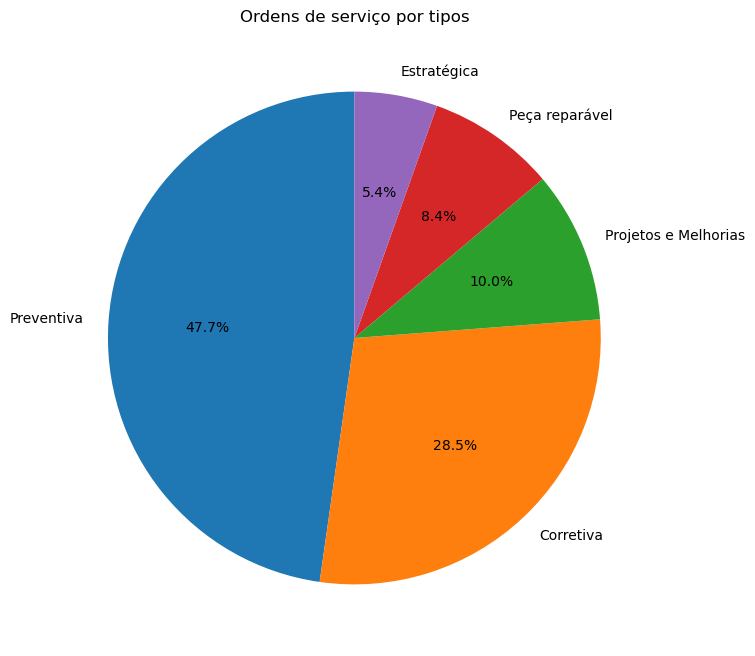

In [50]:
#Graficos OS - Tipos

Filtro_tipos = df_eam['Tipo'].value_counts()

porcentagem_tipos = (Filtro_tipos / Filtro_tipos.sum()) * 100
    
df_porcentagem = pd.DataFrame({'Tipo': porcentagem_tipos.index, 'Porcentagem': porcentagem_tipos.values})

print(df_porcentagem)

plt.figure(figsize=(8, 8))
plt.pie(df_porcentagem['Porcentagem'], labels=df_porcentagem['Tipo'], autopct='%1.1f%%', startangle=90)
plt.title('Ordens de serviço por tipos')
plt.show()

  Departamento  Qtd OS
0          DME    1317
1          DMM     941
2          PCM     167


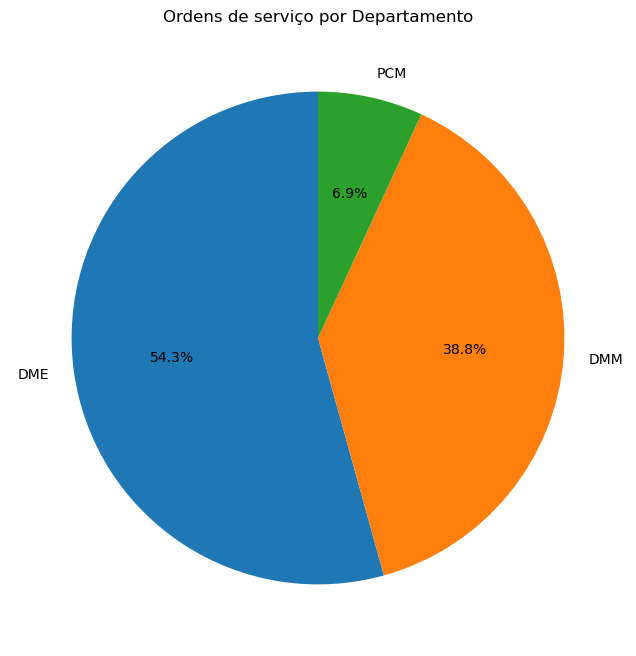

In [36]:
#Graficos OS - OS TOTAL por departamento

departamentos_excluir.extend(Filtro_depart[Filtro_depart < 10].index)

df_filtrado = df_filtrado[~df_filtrado['Departamento'].isin(departamentos_excluir)]

Filtro_depart = df_filtrado['Departamento'].value_counts()

df_OS_depart = pd.DataFrame({'Departamento': Filtro_depart.index, 'Qtd OS': Filtro_depart.values})

print(df_OS_depart)

plt.figure(figsize=(8, 8))
plt.pie(df_OS_depart['Qtd OS'], labels=df_OS_depart['Departamento'], autopct='%1.1f%%', startangle=90)
plt.title('Ordens de serviço por Departamento')
plt.show()


Status
Serviço executado             328
Programada                    242
Em execução                   114
Cancelado                      22
Aguarda parada                 20
Aguarda programação             7
Aguarda M.O                     7
Aguarda material                3
Solicitação de serviço          1
Em análise                      1
Lançado                         1
Aguarda recurso financeiro      1
Name: count, dtype: int64


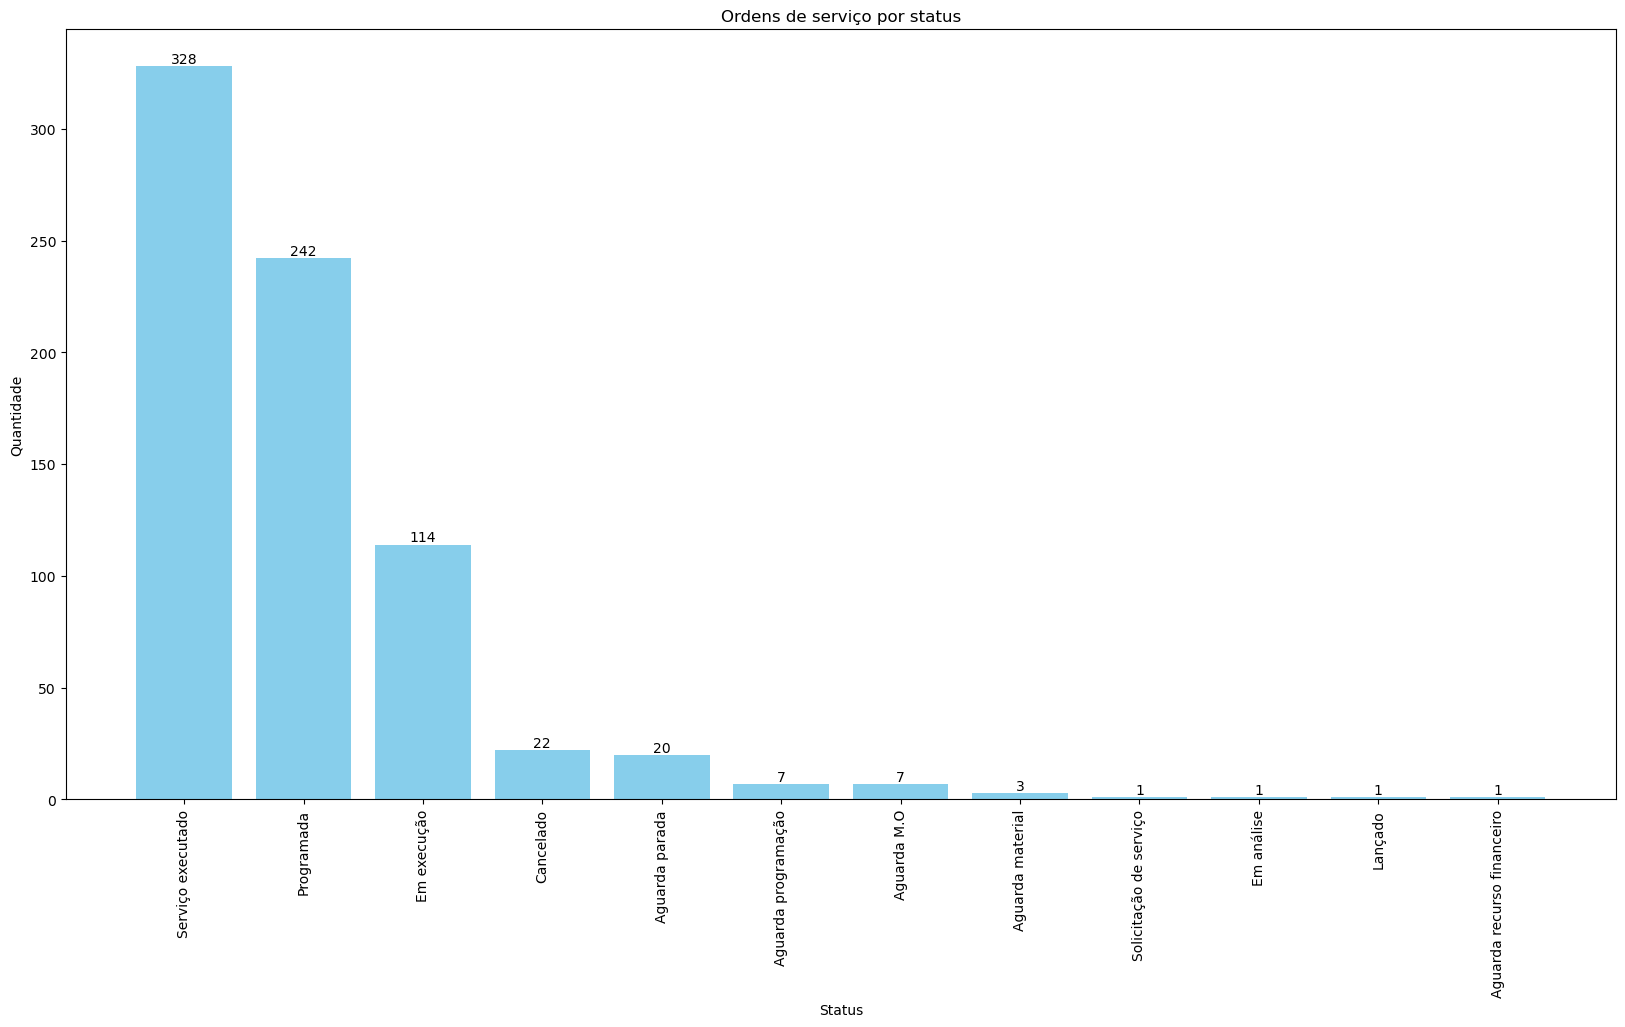

In [49]:
#Graficos OS - Status

excluir = ['Concluído'] 

df_filtrado = df_eam[~df_eam['Status'].isin(excluir)]

Filtro_status = df_filtrado['Status'].value_counts()

print(Filtro_status)

plt.figure(figsize=(20, 10))
bars = plt.bar(Filtro_status.index, Filtro_status, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Ordens de serviço por status')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.xticks(rotation='vertical')
plt.show()


In [3]:
df_eam.head()

,Ordem de serviço,Descrição,Classe,Prioridade,Atribuído a,Atribuído a nome,Supervisor,Status,Descrição do equipamento,Local do serviço,Departamento,Equipamento,Relatado por,Data de início programada,Nível,Horas estimadas,Pessoal requerido,Tipo,Data do informe,Horas de parada
0,30004,Regularização dos ramais da expedição,PRV-AJUS,P2 - Média,RM045,David Welington Oliveira Soares Leitão,RM023,Em execução,Predial,Unidade Painéis e Pisos \ Eucatex,DME,109,RM045,2023-10-06,ELET,14.0,1.0,Preventiva,2023-10-06 13:20:00,NaN
1,30003,Substituição do pente de diodos da fase R da p...,COR-EMER,P1 - Alta,RM005,Wilson Pelicia,RM021,Serviço executado,Formação,Linha Hydrodyn \ Fabricação do painel \ Unidad...,DME,30749,RM005,2023-10-05,ELET,2.0,1.0,Corretiva,2023-10-06 08:03:00,NaN
2,30002,Substituição do Trocador de íons da HF1.,COR-PROG,P2 - Média,RM005,Wilson Pelicia,RM021,Serviço executado,Formação,Linha Hydrodyn \ Fabricação do painel \ Unidad...,DME,30749,RM005,2023-10-06,ELET,1.0,1.0,Corretiva,2023-10-05 07:46:00,NaN
3,30001,Substituir o Detector de potencial dos Eletro...,COR-PROG,P2 - Média,RM005,Wilson Pelicia,NaN,Serviço executado,Formação,Linha Hydrodyn \ Fabricação do painel \ Unidad...,DME,30749,RM005,2023-10-05,ELET,1.0,1.0,Corretiva,2023-10-06 07:39:00,NaN
4,30000,Substituir engate rápido das conexões do tri...,COR-PROG,P2 - Média,RM005,Wilson Pelicia,RM021,Serviço executado,Formação,Linha Hydrodyn \ Fabricação do painel \ Unidad...,DME,30749,RM005,2023-10-05,ELET,3.0,1.0,Corretiva,2023-10-06 07:25:00,NaN


     Classe  Porcentagem
0  COR-PROG    42.908654
1  COR-EMER    29.687500
2  COR-REPR    27.403846


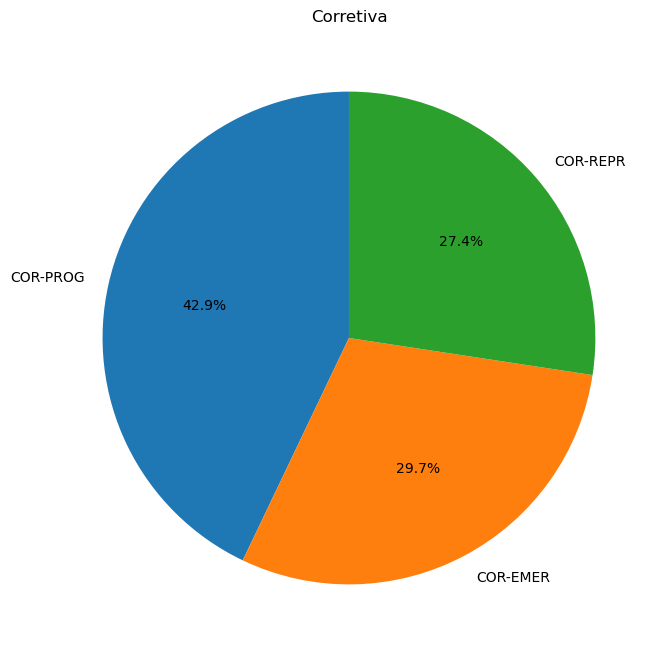

    Classe  Porcentagem
0  PM-MAQN    67.410714
1  PM-ORGA    20.982143
2  PM-REDC     7.142857
3  PM-PROD     4.464286


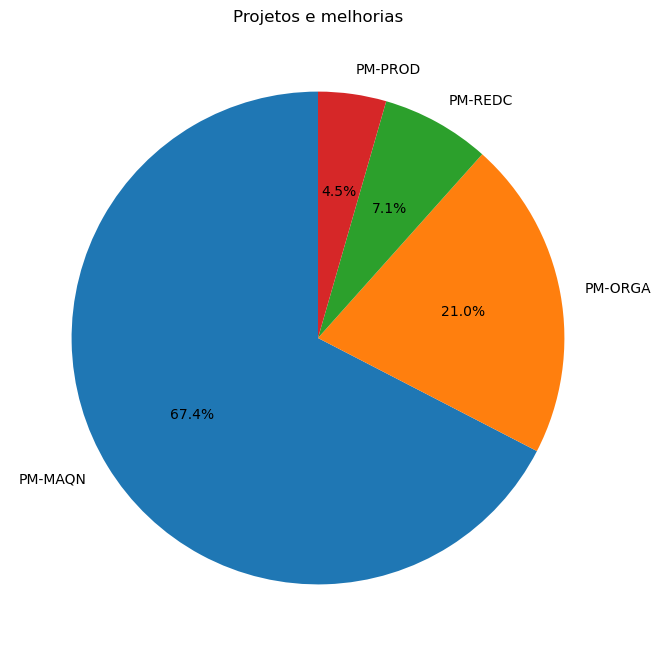

     Classe  Porcentagem
0  EST-PLAN    76.315789
1  EST-ORGA    23.684211


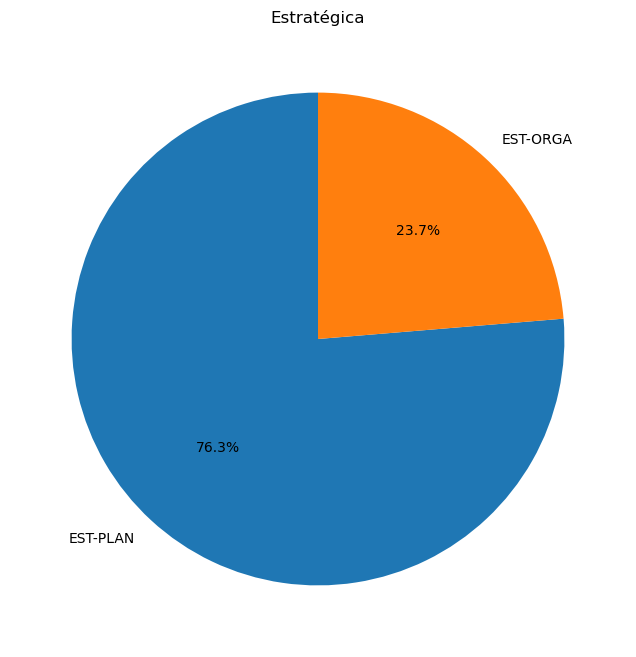

Empty DataFrame
Columns: [Classe, Porcentagem]
Index: []


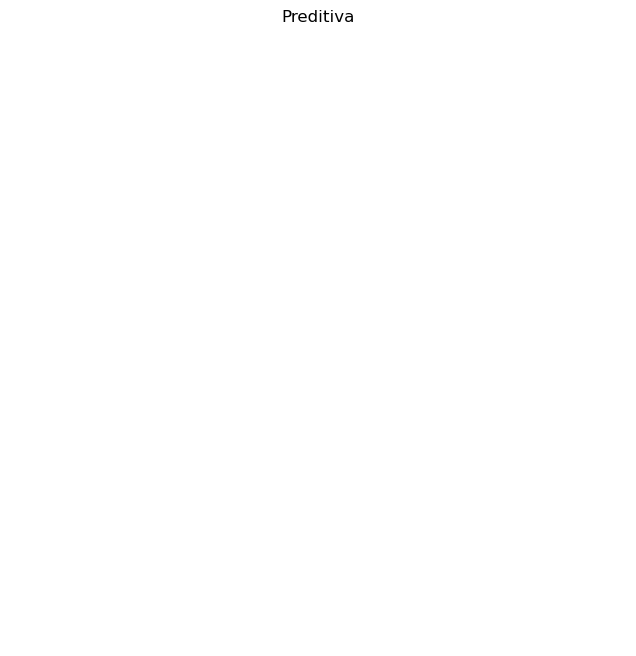

     Classe  Porcentagem
0  PRV-INSP    36.424474
1  PRV-SUBS    34.799235
2  PRV-REVI     8.604207
3  PRV-AJUS     7.648184
4  PRV-TEST     5.640535
5  PRV-REFO     2.868069
6  PRV-CONS     2.772467
7  PRV-CALI     1.242830


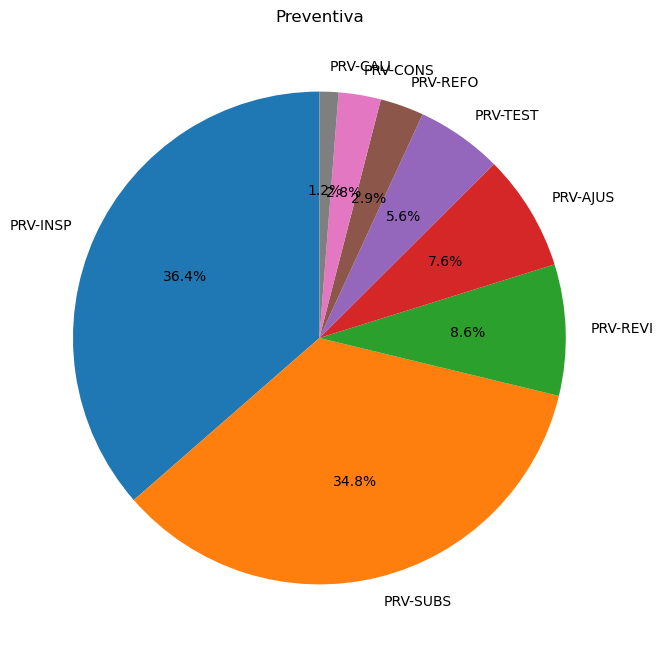

In [58]:
#Grafico OS - Todos os tipos de OS (corretiva,
#projeto e melhoria, estrategica, preditiva e preventiva)

#Corretiva
corr_ = ['COR-EMER', 'COR-PROG', 'COR-REPR'] 

corr_df_filtrado = df_eam[df_eam['Classe'].isin(corr_)]

corr_Filtro_status = corr_df_filtrado['Classe'].value_counts()

corr_porcentagem_tipos = (corr_Filtro_status / corr_Filtro_status.sum()) * 100
    
corr_df_porcentagem = pd.DataFrame({'Classe': corr_porcentagem_tipos.index, 'Porcentagem': corr_porcentagem_tipos.values})

print(corr_df_porcentagem)

plt.figure(figsize=(8, 8))
plt.pie(corr_df_porcentagem['Porcentagem'], labels=corr_df_porcentagem['Classe'], autopct='%1.1f%%', startangle=90)
plt.title('Corretiva')
plt.show()

#Projetos e melhorias
Pm_ = ['PM-REDC', 'PM-PROD', 'PM-ORGA', 'PM-MAQN']  

Pm_df_filtrado = df_eam[df_eam['Classe'].isin(Pm_)]

Pm_Filtro_status = Pm_df_filtrado['Classe'].value_counts()

Pm_porcentagem_tipos = (Pm_Filtro_status / Pm_Filtro_status.sum()) * 100
    
Pm_df_porcentagem = pd.DataFrame({'Classe': Pm_porcentagem_tipos.index, 'Porcentagem': Pm_porcentagem_tipos.values})

print(Pm_df_porcentagem)

plt.figure(figsize=(8, 8))
plt.pie(Pm_df_porcentagem['Porcentagem'], labels=Pm_df_porcentagem['Classe'], autopct='%1.1f%%', startangle=90)
plt.title('Projetos e melhorias')
plt.show()

#Estratégica
Est_ = ['EST_TRN', 'EST_ANFA', 'EST-ORGA', 'EST-PLAN']

Est_df_filtrado = df_eam[df_eam['Classe'].isin(Est_)]

Est_Filtro_status = Est_df_filtrado['Classe'].value_counts()

Est_porcentagem_tipos = (Est_Filtro_status / Est_Filtro_status.sum()) * 100
    
Est_df_porcentagem = pd.DataFrame({'Classe': Est_porcentagem_tipos.index, 'Porcentagem': Est_porcentagem_tipos.values})

print(Est_df_porcentagem)

plt.figure(figsize=(8, 8))
plt.pie(Est_df_porcentagem['Porcentagem'], labels=Est_df_porcentagem['Classe'], autopct='%1.1f%%', startangle=90)
plt.title('Estratégica')
plt.show()

#Preditiva

Pdt_ = ['PDT_ANCI', 'PDT_ANVI', 'PDT_TERM']

Pdt_df_filtrado = df_eam[df_eam['Classe'].isin(Pdt_)]

Pdt_Filtro_status = Pdt_df_filtrado['Classe'].value_counts()

Pdt_porcentagem_tipos = (Pdt_Filtro_status / Pdt_Filtro_status.sum()) * 100
    
Pdt_df_porcentagem = pd.DataFrame({'Classe': Pdt_porcentagem_tipos.index, 'Porcentagem': Pdt_porcentagem_tipos.values})

print(Pdt_df_porcentagem)

plt.figure(figsize=(8, 8))
plt.pie(Pdt_df_porcentagem['Porcentagem'], labels=Pdt_df_porcentagem['Classe'], autopct='%1.1f%%', startangle=90)
plt.title('Preditiva')
plt.show()

#Preventiva
Prv_ = ['PRV-REFO', 'PRV-CALI', 'PRV-CONS', 'PRV-REVI', 'PRV-AJUS', 'PRV-TEST', 'PRV-SUBS', 'PRV-INSP']  

Prv_df_filtrado = df_eam[df_eam['Classe'].isin(Prv_)]

Prv_Filtro_status = Prv_df_filtrado['Classe'].value_counts()

Prv_porcentagem_tipos = (Prv_Filtro_status / Prv_Filtro_status.sum()) * 100
    
Prv_df_porcentagem = pd.DataFrame({'Classe': Prv_porcentagem_tipos.index, 'Porcentagem': Prv_porcentagem_tipos.values})

print(Prv_df_porcentagem)

plt.figure(figsize=(8, 8))
plt.pie(Prv_df_porcentagem['Porcentagem'], labels=Prv_df_porcentagem['Classe'], autopct='%1.1f%%', startangle=90)
plt.title('Preventiva')
plt.show()




Manipulando dados do PC Factory

In [19]:
df_pcfactory.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5861 entries, 0 to 5860
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Cód.Status de Recurso                 5861 non-null   int64  
 1   Apelido Status Recurso                5861 non-null   object 
 2   Nome Status Recurso                   5861 non-null   object 
 3   Recurso                               5861 non-null   object 
 4   Início                                5861 non-null   object 
 5   Término                               5861 non-null   object 
 6   T.Decorrido                           5861 non-null   object 
 7   Status de Recurso                     5861 non-null   object 
 8   OP                                    5508 non-null   object 
 9   P/N                                   5508 non-null   float64
 10  Cód.Detalhe de Status                 0 non-null      float64
 11  Nome do Detalhe d

In [20]:
df_pcfactory.head()

,Cód.Status de Recurso,Apelido Status Recurso,Nome Status Recurso,Recurso,Início,Término,T.Decorrido,Status de Recurso,OP,P/N,...,Comentários,Cód.Aux.Status 1,Cód.Aux.Status 2,Cód.Aux.Status 3,Cód.Externo Recurso,Cód.Externo Status Recurso,Cód.Ferramental,Nome Ferramental,Cód.Tipo Ferramental,Nome Tipo Ferramental
0,1301,Fora de Turno,Fora de Turno,ACE-MDF-RG,01/10/2023 07:00:00,01/10/2023 15:00:00,8:00:00,[1301] Fora de Turno,NaN,NaN,...,NaN,NaN,NaN,NaN,EMS,NaN,NaN,NaN,NaN,NaN
1,1301,Fora de Turno,Fora de Turno,ACE-MDF-RG,01/10/2023 15:00:00,01/10/2023 23:00:00,8:00:00,[1301] Fora de Turno,NaN,NaN,...,NaN,NaN,NaN,NaN,EMS,NaN,NaN,NaN,NaN,NaN
2,1301,Fora de Turno,Fora de Turno,ACE-MDF-RG,01/10/2023 23:00:00,02/10/2023 07:00:00,8:00:00,[1301] Fora de Turno,NaN,NaN,...,NaN,NaN,NaN,NaN,EMS,NaN,NaN,NaN,NaN,NaN
3,1301,Fora de Turno,Fora de Turno,ACE-MDF-RG,02/10/2023 07:00:00,02/10/2023 15:00:00,8:00:00,[1301] Fora de Turno,NaN,NaN,...,NaN,NaN,NaN,NaN,EMS,NaN,NaN,NaN,NaN,NaN
4,1301,Fora de Turno,Fora de Turno,ACE-MDF-RG,02/10/2023 15:00:00,02/10/2023 23:00:00,8:00:00,[1301] Fora de Turno,NaN,NaN,...,NaN,NaN,NaN,NaN,EMS,NaN,NaN,NaN,NaN,NaN


In [21]:
df_pcfactory['T.Decorrido']=pd.to_timedelta(df_pcfactory['T.Decorrido'])

In [22]:
# MTBF - Tempo médio entre falhas
    
df_filtrado = df_pcfactory[(df_pcfactory['Status de Recurso'] == '[0202] Manutenção Elétrica') | 
                           (df_pcfactory['Status de Recurso'] == '[0203] Manutenção Mecânica') |
                           (df_pcfactory['Status de Recurso'] == '[0201] Manutenção Programada') |
                           (df_pcfactory['Status de Recurso'] == '[1101] Parada não Identificada')]
    
Horas_Paradas= df_filtrado.groupby('Recurso')['T.Decorrido'].sum()

Falhas= df_filtrado['Recurso'].value_counts()

df_produzindo = df_pcfactory[(df_pcfactory['Status de Recurso'] == '[0101] Producao') | 
                           (df_pcfactory['Status de Recurso'] == '[0902] Refeição') |
                           (df_pcfactory['Status de Recurso'] == '[0838] Término de Produção') |
                           (df_pcfactory['Status de Recurso'] == '[0837] Início de Produção')]

Horas_produzindo = df_produzindo.groupby('Recurso')['T.Decorrido'].sum()

# Converter os tempos para horas
Horas_Paradas = Horas_Paradas / pd.Timedelta(hours=1)
Horas_produzindo = Horas_produzindo / pd.Timedelta(hours=1)


MTBF = (Horas_produzindo - Horas_Paradas)/ Falhas


print(f"MTBF em horas: {MTBF}")



MTBF em horas: Recurso
ACE-MDF-RG          NaN
ACE-PVC-RG    15.336944
ACESS-MDF      7.765139
ACESS-PVC      7.559722
CLAS           3.196481
CYKL           6.618585
EMB-BARB            NaN
EMB-WEMH            NaN
ESLITA              NaN
EXT-TECNO           NaN
GIBEN-CH            NaN
HDYN          34.604676
HOMAG          8.968763
LAQU          30.651597
LIXC          12.328981
SIEMP          2.561285
TOCCHIO             NaN
TORW          10.058472
WEMH          14.466512
dtype: float64


In [23]:
# MTTR - Tempo médio para reparo de um equipamento

df_filtrado = df_pcfactory[(df_pcfactory['Status de Recurso'] == '[0202] Manutenção Elétrica') | 
                           (df_pcfactory['Status de Recurso'] == '[0203] Manutenção Mecânica') |
                           (df_pcfactory['Status de Recurso'] == '[0201] Manutenção Programada')]

Horas_Paradas= df_filtrado.groupby('Recurso')['T.Decorrido'].sum()

reparos= df_filtrado['Recurso'].value_counts()

Horas_Paradas = Horas_Paradas / pd.Timedelta(hours=1)

MTTR_Equip = Horas_Paradas / reparos


print(f"MTTR em horas: {MTTR}")


NameError: name 'MTTR' is not defined

In [24]:
# MTTR - Tempo médio para reparo com base no departamento

df_pcfactory.loc[df_pcfactory['Status de Recurso'] == '[0202] Manutenção Elétrica', 'Departamento'] = 'DME'
df_pcfactory.loc[df_pcfactory['Status de Recurso'] == '[0203] Manutenção Mecânica', 'Departamento'] = 'DMM'
df_pcfactory.loc[df_pcfactory['Status de Recurso'] == '[0201] Manutenção Programada', 'Departamento'] = 'Programada'

df_filtrado = df_pcfactory[(df_pcfactory['Status de Recurso'] == '[0202] Manutenção Elétrica') | 
                           (df_pcfactory['Status de Recurso'] == '[0203] Manutenção Mecânica') |
                           (df_pcfactory['Status de Recurso'] == '[0201] Manutenção Programada')]

Horas_Paradas= df_pcfactory.groupby('Departamento')['T.Decorrido'].sum()

reparos= df_filtrado['Departamento'].value_counts()

Horas_Paradas = Horas_Paradas / pd.Timedelta(hours=1)

MTTR_Depart = Horas_Paradas / reparos


print(f"MTTR em horas: {MTTR}")

NameError: name 'MTTR' is not defined

In [25]:
#Disponibilidade D = MTBF / (MTBF + MTTR) x 100 %
#Mede a eficácia do tempo de inatividade em um sistema ou equipamento.
#É o tempo que a máquina está disponível para funcionar, conforme o programado.


#MTBF 
df_filtrado = df_pcfactory[(df_pcfactory['Status de Recurso'] == '[0202] Manutenção Elétrica') | 
                           (df_pcfactory['Status de Recurso'] == '[0203] Manutenção Mecânica') |
                           (df_pcfactory['Status de Recurso'] == '[0201] Manutenção Programada') |
                           (df_pcfactory['Status de Recurso'] == '[1101] Parada não Identificada')]
    
Horas_Paradas= df_filtrado.groupby('Recurso')['T.Decorrido'].sum()

Falhas= df_filtrado['Recurso'].value_counts()

df_produzindo = df_pcfactory[(df_pcfactory['Status de Recurso'] == '[0101] Producao') | 
                           (df_pcfactory['Status de Recurso'] == '[0902] Refeição') |
                           (df_pcfactory['Status de Recurso'] == '[0838] Término de Produção') |
                           (df_pcfactory['Status de Recurso'] == '[0837] Início de Produção')]

Horas_produzindo = df_produzindo.groupby('Recurso')['T.Decorrido'].sum()

Horas_Paradas = Horas_Paradas / pd.Timedelta(hours=1)
Horas_produzindo = Horas_produzindo / pd.Timedelta(hours=1)


MTBF = (Horas_produzindo - Horas_Paradas)/ Falhas

#MTTR
df_filtrado = df_pcfactory[(df_pcfactory['Status de Recurso'] == '[0202] Manutenção Elétrica') | 
                           (df_pcfactory['Status de Recurso'] == '[0203] Manutenção Mecânica') |
                           (df_pcfactory['Status de Recurso'] == '[0201] Manutenção Programada')]

Horas_Paradas= df_filtrado.groupby('Recurso')['T.Decorrido'].sum()

reparos= df_filtrado['Recurso'].value_counts()

Horas_Paradas = Horas_Paradas / pd.Timedelta(hours=1)

MTTR_Equip = Horas_Paradas / reparos

D = (MTBF / (MTBF + MTTR_Equip)) * 100

print(f"Downtime Effectiveness (D): {D}%")

Downtime Effectiveness (D): Recurso
ACE-MDF-RG          NaN
ACE-PVC-RG    97.784429
ACESS-MDF     89.763185
ACESS-PVC     97.206844
CLAS          96.550908
CYKL          97.805095
EMB-BARB            NaN
EMB-WEMH            NaN
ESLITA              NaN
EXT-TECNO           NaN
GIBEN-CH            NaN
HDYN          98.049082
HOMAG         94.411491
LAQU          93.294146
LIXC          98.774736
SIEMP         97.469287
TOCCHIO             NaN
TORW          84.431361
WEMH          99.111682
dtype: float64%


In [26]:
#Confiabilidade de ativo
#probabilidade de um componente desempenhar sua função de
#acordo com as condições de operação e durante um intervalo específico de tempo.

df_filtrado = df_pcfactory[(df_pcfactory['Status de Recurso'] == '[0202] Manutenção Elétrica') | 
                           (df_pcfactory['Status de Recurso'] == '[0203] Manutenção Mecânica') |
                           (df_pcfactory['Status de Recurso'] == '[0201] Manutenção Programada') |
                           (df_pcfactory['Status de Recurso'] == '[1101] Parada não Identificada')]
    
Horas_Paradas= df_filtrado.groupby('Recurso')['T.Decorrido'].sum()

Falhas= df_filtrado['Recurso'].value_counts()

df_produzindo = df_pcfactory[(df_pcfactory['Status de Recurso'] == '[0101] Producao') | 
                           (df_pcfactory['Status de Recurso'] == '[0902] Refeição') |
                           (df_pcfactory['Status de Recurso'] == '[0838] Término de Produção') |
                           (df_pcfactory['Status de Recurso'] == '[0837] Início de Produção')]

Horas_produzindo = df_produzindo.groupby('Recurso')['T.Decorrido'].sum()

Horas_Paradas = Horas_Paradas / pd.Timedelta(hours=1)
Horas_produzindo = Horas_produzindo / pd.Timedelta(hours=1)

MTBF = (Horas_produzindo - Horas_Paradas) / Falhas
taxa_de_falha = 1 / MTBF 
tempo = 100 #a cada 100horas

R = 2.7182 ** (-taxa_de_falha * tempo) * 100

R = round(R, 2)

print(f"Confiabilidade R no tempo t: {R}%")


Confiabilidade R no tempo t: Recurso
ACE-MDF-RG     NaN
ACE-PVC-RG    0.15
ACESS-MDF     0.00
ACESS-PVC     0.00
CLAS          0.00
CYKL          0.00
EMB-BARB       NaN
EMB-WEMH       NaN
ESLITA         NaN
EXT-TECNO      NaN
GIBEN-CH       NaN
HDYN          5.56
HOMAG         0.00
LAQU          3.83
LIXC          0.03
SIEMP         0.00
TOCCHIO        NaN
TORW          0.00
WEMH          0.10
dtype: float64%


In [36]:
# Calculo de OEE Simplificado
# OEE simplificado pois não temos os dados que estão faltado
#(Performance[velocidade real/ velocidade padrão])
#(Qualidade[quantidade de produtos bons/ total produtos produzidos])

df_filtrado = df_pcfactory[df_pcfactory['Nome Grupo de Status de Recurso'] == 'PRODUÇÃO'].copy()

df_filtrado['T.Decorrido'] = pd.to_numeric(df_filtrado['T.Decorrido'], errors='coerce').fillna(0)

Horas_Producao= df_filtrado.groupby('Recurso')['T.Decorrido'].sum()

df_resultado = pd.DataFrame()

# Calcular o OEE Simplificado
# 730 é total de horas colocado, ajustar conforme precise

df_resultado['OEE_Simplificado'] = (Horas_Producao / 730) * 100  # 730 é o tempo total disponível, ajuste conforme necessário


print("OEE Simplificado (%):")
print(df_resultado['OEE_Simplificado'])



OEE Simplificado (%):
Recurso
ACE-MDF-RG    5.050822e+12
ACE-PVC-RG    6.564384e+12
ACESS-MDF     3.841205e+13
ACESS-PVC     7.070685e+12
CLAS          3.857959e+13
CYKL          6.979822e+13
ESLITA        5.803425e+13
EXT-TECNO     6.718397e+13
GIBEN-CH      1.623671e+13
HDYN          1.038495e+14
HOMAG         4.648137e+13
LAQU          6.480945e+13
LIXC          8.934699e+13
SIEMP         3.643425e+13
TOCCHIO       8.734822e+13
TORW          1.008904e+13
WEMH          6.340178e+13
Name: OEE_Simplificado, dtype: float64
